# MNIST Classifier
Build a classifier to that achieves 97% accuracy on the MNIST dataset

In [ ]:
#Collect and display data

import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

for index, (image, label) in enumerate(list(zip(digits.images, digits.target))[:4]):
  plt.subplot(1,4, index+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Label -- {0}'.format(label))

In [0]:
#Reshape the data for ML Algorithm
data = digits.images.reshape((len(digits.images), -1))

#Split the data
X_train, X_test, y_train, y_test = data[:1300], data[1300:], digits.target[:1300], digits.target[1300:]

In [0]:
#Tune a model on KNN algorithm and inspect results

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

params = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'p':[1,2,3]
}

clf = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', GridSearchCV(KNeighborsClassifier(), params, cv=3, scoring='accuracy'))
])


In [0]:
_ = clf.fit(X_train, y_train)
clf.named_steps['knn'].best_score_

0.9207692307692308

In [0]:
clf.named_steps['knn'].best_params_

{'n_neighbors': 3, 'p': 1}

In [0]:
class_names = clf.named_steps['knn'].best_estimator_.classes_
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

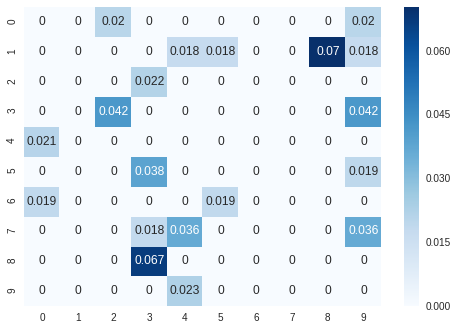

In [0]:
#Performance Analysis using a Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

conf_mx = confusion_matrix(clf.predict(X_test), y_test)
norm_conf_mx = conf_mx / conf_mx.sum(axis=1, keepdims=True)
np.fill_diagonal(norm_conf_mx, 0)

ax = sns.heatmap(norm_conf_mx, cmap=plt.cm.Blues, annot=True, cbar=True, xticklabels=class_names, yticklabels=class_names)

In [0]:
#Test data accuracy

from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test), y_test)

0.9416498993963782

# Evaluation

Our test performance is quite high at over 94%! We can see what numbers are confusioned with others and what numbers are often missed by using the confusion matrix. With this as our guide we could include feature engineering aspects to our pipeline to focus on the weaknesses.

# Data Augmentation
Create extra synthetic samples by shifting each image in different directions. Retrain and test the model to look for improvements

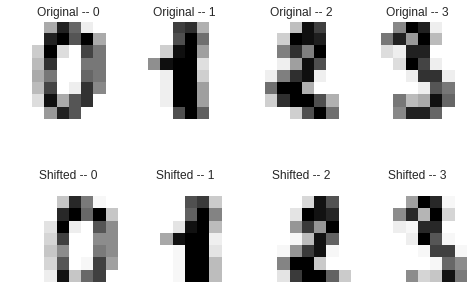

In [0]:
#Add data for training by shifting current data and using as new samples

from scipy.ndimage.interpolation import shift

for index, (image, label) in enumerate(list(zip(digits.images, digits.target))[:4]):
  plt.subplot(2,4, index+1)
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.axis('off')
  plt.title('Original -- {0}'.format(label))
  
  plt.subplot(2,4, index+5)
  plt.imshow(shift(image, shift=[1,1], cval=0))
  plt.axis('off')
  plt.title('Shifted -- {0}'.format(label))

In [0]:
#Collect augmented data

from sklearn.model_selection import train_test_split

x_augmented = [image.reshape(-1) for image in digits.images]
y_augmented = [image for image in digits.target]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
  for image, label in zip(digits.images, digits.target):
    shifted = shift(image, shift=[dy,dx], cval=0)
    x_augmented.append(shifted.reshape(-1))
    y_augmented.append(label)

X_train, X_test, y_train, y_test = train_test_split(x_augmented, y_augmented, test_size=.33)

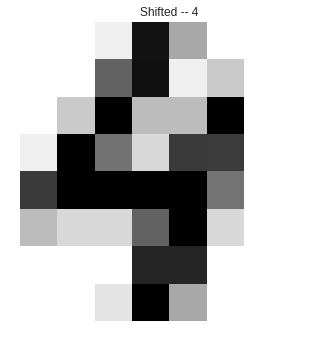

In [0]:
#Spot check for correctness

plt.imshow(X_train[132].reshape(8,8))
plt.axis('off')
ax = plt.title('Shifted -- {0}'.format(y_train[132]))

In [0]:
#Fit and evaluate the model
_ = clf.fit(X_train, y_train)
clf.named_steps['knn'].best_score_

0.9752450573184914

# Evaluation
After augmenting the data to increase the amount of samples our new model has an increased accuracy!